## Get dataset

In [1]:
import os
import pandas as pd

path = os.path.join(os.getcwd(), '../', 'data', 'processed', 'processed_data.csv')
df = pd.read_csv(path)

df.head()

,promedio_global,materias_reprobadas,edad,apoyo_familiar,minutos_traslado,horas_estudio,horas_trabajo,horas_sueno,frecuencia_IA,escuela,genero,dependientes_economicos,personas_a_cargo,apoyos_economicos,foraneo,validacion_encuesta,enfermedad_cronica,satisfaccion_carrera,ejercer_carrera
0,8.4,0.0,20,5,15.0,3.0,0.0,6.0,4,1,1,0,1,1,1,2,0,2,2
1,6.0,1.0,19,5,60.0,1.0,0.0,7.0,4,1,1,1,1,0,0,2,0,2,2
2,7.7,0.0,19,5,60.0,1.0,5.0,5.0,4,1,1,0,1,0,0,2,0,2,2
3,6.4,1.0,19,5,60.0,3.0,1.0,5.0,1,1,1,0,1,1,0,2,0,0,2
4,6.5,4.0,21,5,40.0,4.0,0.0,6.0,3,1,1,0,1,0,0,2,0,2,2


## Main

In [2]:
df.describe()

,promedio_global,materias_reprobadas,edad,apoyo_familiar,minutos_traslado,horas_estudio,horas_trabajo,horas_sueno,frecuencia_IA,escuela,genero,dependientes_economicos,personas_a_cargo,apoyos_economicos,foraneo,validacion_encuesta,enfermedad_cronica,satisfaccion_carrera,ejercer_carrera
count,1833.00000,1833.000000,1833.000000,1833.00000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000
mean,8.02437,2.009547,21.212220,4.23677,85.945172,3.551118,2.020185,5.669013,3.010911,3.188216,0.569558,0.187125,1.096563,0.691217,0.289689,1.954719,0.076923,1.701037,1.844517
std,1.01833,2.639476,4.498571,1.05763,43.836722,10.679540,10.370425,5.638475,1.173716,2.357751,0.512604,0.390118,0.308104,0.462118,0.453742,0.269685,0.266542,0.691562,0.417080
min,0.00000,0.000000,16.000000,1.00000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.60000,0.000000,20.000000,4.00000,50.000000,2.000000,0.000000,5.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000
50%,8.08000,1.000000,21.000000,5.00000,90.000000,3.000000,0.000000,6.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,2.000000
75%,8.67000,3.000000,22.000000,5.00000,120.000000,4.000000,3.000000,6.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000
max,10.00000,34.000000,190.000000,5.00000,180.000000,240.000000,300.000000,240.000000,5.000000,8.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000


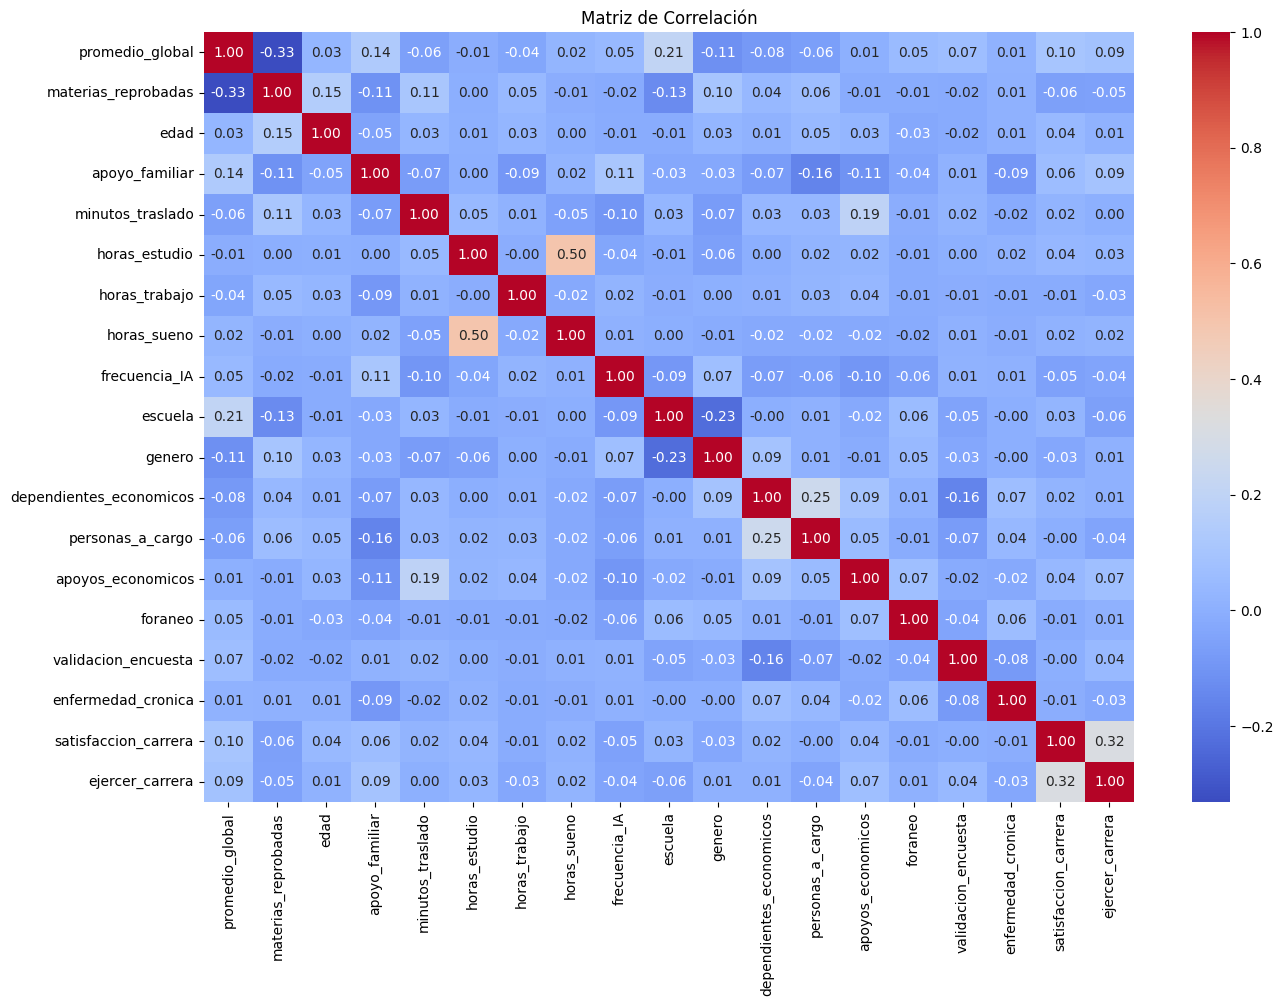

In [3]:
# Matriz de correlación
correlation_matrix = df.corr()

# Visualización (opcional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [4]:
# Analysis of feature importance

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['promedio_global'])
y = df['promedio_global']

model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Show feature importances
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
print(feature_importance.sort_values(by='importance', ascending=False))


                    feature  importance
0       materias_reprobadas    0.218318
1                      edad    0.119145
8                   escuela    0.105110
3          minutos_traslado    0.085472
6               horas_sueno    0.082744
4             horas_estudio    0.079203
7             frecuencia_IA    0.056891
2            apoyo_familiar    0.048989
9                    genero    0.043078
5             horas_trabajo    0.039152
17          ejercer_carrera    0.028764
16     satisfaccion_carrera    0.020793
13                  foraneo    0.020585
12        apoyos_economicos    0.014489
10  dependientes_economicos    0.012470
11         personas_a_cargo    0.010961
15       enfermedad_cronica    0.009041
14      validacion_encuesta    0.004794


In [5]:
# Feature selection

from sklearn.feature_selection import SelectKBest, f_classif

# Select the 5 best features
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# See selected features
selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['materias_reprobadas', 'apoyo_familiar', 'escuela', 'apoyos_economicos',
       'ejercer_carrera'],
      dtype='object')


## Detection of outliers

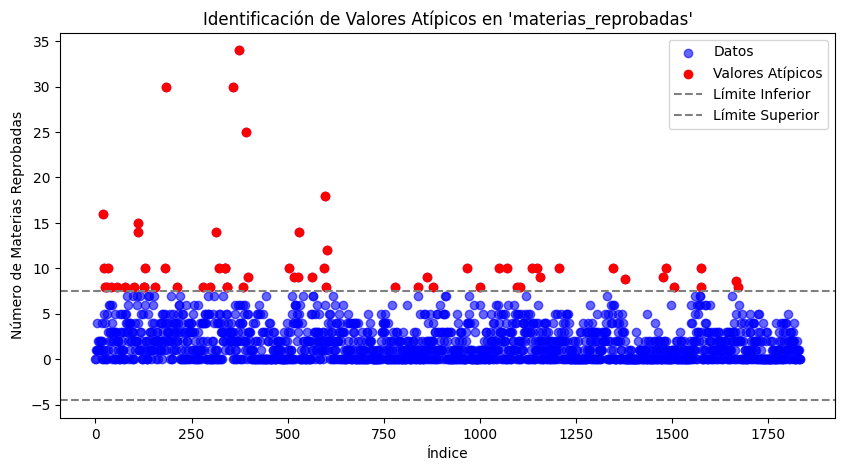

In [6]:
import matplotlib.pyplot as plt

Q1 = df['materias_reprobadas'].quantile(0.25)
Q3 = df['materias_reprobadas'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['materias_reprobadas'] < lower_bound) | (df['materias_reprobadas'] > upper_bound)]

# Graficar distribución de los datos con valores atípicos resaltados
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['materias_reprobadas'], label="Datos", color='blue', alpha=0.6)
plt.scatter(outliers.index, outliers['materias_reprobadas'], label="Valores Atípicos", color='red', marker='o')
plt.axhline(y=lower_bound, color='gray', linestyle='dashed', label="Límite Inferior")
plt.axhline(y=upper_bound, color='gray', linestyle='dashed', label="Límite Superior")
plt.title("Identificación de Valores Atípicos en 'materias_reprobadas'")
plt.xlabel("Índice")
plt.ylabel("Número de Materias Reprobadas")
plt.legend()
plt.show()

In [7]:
df_cleaned = df[(df['materias_reprobadas'] >= lower_bound) & (df['materias_reprobadas'] <= upper_bound)]
df_cleaned.describe()

,promedio_global,materias_reprobadas,edad,apoyo_familiar,minutos_traslado,horas_estudio,horas_trabajo,horas_sueno,frecuencia_IA,escuela,genero,dependientes_economicos,personas_a_cargo,apoyos_economicos,foraneo,validacion_encuesta,enfermedad_cronica,satisfaccion_carrera,ejercer_carrera
count,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000
mean,8.046751,1.695537,21.128814,4.250847,85.337571,3.570282,1.980791,5.676441,3.006215,3.213559,0.564972,0.186441,1.094915,0.688701,0.289266,1.954802,0.076271,1.705085,1.847458
std,1.021020,1.817031,4.523704,1.046306,43.782045,10.858764,10.523624,5.731272,1.173220,2.362233,0.510505,0.389572,0.306380,0.463156,0.453550,0.269396,0.265507,0.688291,0.413736
min,0.000000,0.000000,16.000000,1.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,0.000000,20.000000,4.000000,50.000000,2.000000,0.000000,5.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000
50%,8.100000,1.000000,21.000000,5.000000,90.000000,3.000000,0.000000,6.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,2.000000
75%,8.700000,3.000000,22.000000,5.000000,120.000000,4.000000,3.000000,6.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000
max,10.000000,7.000000,190.000000,5.000000,180.000000,240.000000,300.000000,240.000000,5.000000,8.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000


In [8]:
# Save cleaned data
path_cleaned = os.path.join(os.getcwd(), '../', 'data', 'processed', 'processed_data_cleaned.csv')
df_cleaned.to_csv(path_cleaned, index=False)